In [ ]:
# Step 1: Importing necessary libraries
# Pandas and NumPy are used for data manipulation.
# Matplotlib and Seaborn are used for data visualization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Step 2: Reading the supply chain dataset into a DataFrame.
# This step is essential to load the data into memory for further exploration.
# Read the dataset
df = pd.read_csv('/content/Supply_chain_cleaned_data.csv')

In [ ]:
# Step 3: Displaying the first five rows of the dataset.
# This preview helps to confirm that the data was loaded correctly and gives an initial look at the structure.
df.head()

,id,project code,pq #,po / so #,asn/dn #,country,managed by,fulfill via,vendor inco term,shipment mode,...,manufacturing site,first line designation,weight (kilograms),freight cost (usd),line item insurance (usd),pq_to_po_days,valid_timeline,freight cost (usd)_original,freight_included_flag,weight_per_unit
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,Ranbaxy Fine Chemicals LTD,True,13.0,780.34,38.45,NaN,False,780.34,False,0.684211
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,"Aurobindo Unit III, India",True,358.0,4521.50,38.45,NaN,False,4521.5,False,0.358000
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,ABBVIE GmbH & Co.KG Wiesbaden,True,171.0,1653.78,38.45,NaN,False,1653.78,False,0.342000
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,"Ranbaxy, Paonta Shahib, India",True,1855.0,16007.06,38.45,NaN,False,16007.06,False,0.058114
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,"Aurobindo Unit III, India",True,7590.0,45450.08,38.45,NaN,False,45450.08,False,0.199737


💡 **Result:**  
The dataset was successfully loaded into a pandas DataFrame.  
The `df.head()` function displayed the first 5 rows of the dataset, providing an initial overview of the data structure.  
The output confirmed the presence of key columns such as `project code`, `country`, `vendor`, `item description`, and `delivery dates`.  
This step ensured that the data was read correctly and is ready for further exploration.

In [ ]:
# Step 4: Checking the shape of the dataset.
# This step displays the total number of rows and columns in the dataset, which helps to understand the dataset's scale.
df.shape

(10324, 38)

💡 Result:

The output showed:
(Number of Rows, Number of Columns) — (10324, 38)
This means the dataset contains 10324 records across 38 columns

In [ ]:
# Step 5: Displaying detailed information about the dataset.
# This includes column names, data types, and the count of non-null values for each column.
# This step is essential to identify missing values and confirm correct data types before analysis.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 38 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            10324 non-null  int64  
 1   project code                  10324 non-null  object 
 2   pq #                          10324 non-null  object 
 3   po / so #                     10324 non-null  object 
 4   asn/dn #                      10324 non-null  object 
 5   country                       10324 non-null  object 
 6   managed by                    10324 non-null  object 
 7   fulfill via                   10324 non-null  object 
 8   vendor inco term              10324 non-null  object 
 9   shipment mode                 10324 non-null  object 
 10  pq first sent to client date  7643 non-null   object 
 11  po sent to vendor date        8393 non-null   object 
 12  scheduled delivery date       10324 non-null  object 
 13  d

💡 **Result:**  
The `df.info()` method provided a detailed summary of the dataset structure.  

- The dataset contains **10,324 rows** and **38 columns**.  
- Data types are a mix of `object`, `int64`, `float64`, and `bool`.  
- Several columns have missing values — for example:  
   - `pq first sent to client date` (7,643 non-null).  
   - `po sent to vendor date` (8,393 non-null).  
   - `freight cost (usd)` (8,870 non-null).  
   - `weight_per_unit` (6,372 non-null).  

This step helped to confirm the dataset size, check for null values, and understand the types of data stored in each column.  
It also flagged columns that will need special attention during cleaning or feature engineering.

In [ ]:
# Generate descriptive statistics for numerical columns
df.describe()

,id,unit of measure (per pack),line item quantity,line item value,pack price,unit price,weight (kilograms),freight cost (usd),line item insurance (usd),pq_to_po_days,weight_per_unit
count,10324.000000,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10324.000000,8870.000000,10324.000000,7643.000000,6372.000000
mean,51098.968229,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,2699.627517,11673.565415,234.582169,39.704697,4.671812
std,31944.332496,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,10937.883547,23341.216397,494.270775,65.393815,121.268278
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-224.000000,0.000000
25%,12795.750000,30.000000,408.000000,4.314593e+03,4.120000,0.080000,75.000000,1570.462958,7.147500,24.000000,0.088684
50%,57540.500000,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,575.135144,4957.905000,42.815000,24.000000,0.140542
75%,83648.250000,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,2523.000000,13583.888640,241.750000,24.500000,0.367643
max,86823.000000,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,857354.000000,826058.981376,7708.440000,414.000000,8529.750000


💡 **Result:**  
The `df.describe()` function generated a statistical summary of all numeric columns.

High variability: Metrics like line item quantity, value, weight, and freight cost show large spreads → expected due to commodity diversity, including RDC items.

Zeros in key fields:

     freight cost = 0 is valid   because cost is bundled into commodity price or RDC shipments.

     unit price = 0 could result from low-value items priced via pack price.

     insurance = 0 may relate to Incoterms or RDC transactions.

Negative values in pq_to_po_days: Likely due to RDC lead time setups or system timestamps.

Missing data: Fields like freight cost and pq_to_po_days have nulls —>> RDC transactions.

Outliers: Large values (e.g., weight > 800,000 kg) are acceptable for specific bulk commodities.


In [ ]:
df.describe( include= object)

,project code,pq #,po / so #,asn/dn #,country,managed by,fulfill via,vendor inco term,shipment mode,pq first sent to client date,...,product group,sub classification,vendor,item description,molecule/test type,brand,dosage,dosage form,manufacturing site,freight cost (usd)_original
count,10324,10324,10324,10324,10324,10324,10324,10324,10324,7643,...,10324,10324,10324,10324,10324,10324,8588,10324,10324,10324
unique,142,1237,6233,7030,43,4,2,8,4,763,...,5,6,73,184,86,48,54,17,88,6733
top,116-ZA-T30,Pre-PQ Process,SCMS-199289,ASN-19166,South Africa,PMO - US,From RDC,N/A - FROM RDC,Air,2014-09-11,...,ARV,Adult,Scms From Rdc,"Efavirenz 600mg, tablets, 30 Tabs",Efavirenz,Generic,300mg,Tablet,"Aurobindo Unit III, India",Freight Included in Commodity Cost
freq,768,2681,67,54,1406,10265,5404,5404,6473,205,...,8550,6595,5404,755,1125,7285,990,3532,3172,1442


In [ ]:
# Check for missing values in each column
df.isnull().sum()

,0
id,0
project code,0
pq #,0
po / so #,0
asn/dn #,0
country,0
managed by,0
fulfill via,0
vendor inco term,0
shipment mode,0


💡 **Result:**  
The `df.isnull().sum()` function was used to confirm the presence of any missing values after the initial cleaning process.

- Although the dataset was cleaned, some columns still contain missing values, especially:  
   - `pq first sent to client date`: 2,681 missing.  
   - `po sent to vendor date`: 1,931 missing.  
   - `dosage`: 1,736 missing.  
   - `freight cost (usd)`: 1,454 missing.  
   - `pq_to_po_days`: 2,681 missing.  
   - `weight_per_unit`: 3,952 missing.

This check ensures a clear understanding of data completeness before moving forward to the analysis stage.


In [ ]:
# Detect and count duplicate rows in the dataset
df.duplicated().sum()

np.int64(0)

💡 **Result:**  
The `df.duplicated().sum()` function was used to check for duplicated rows in the dataset.

- The result shows **0 duplicated rows**.
- This confirms that the dataset is clean and free of duplicate entries, which is essential before proceeding to the analysis stage.


In [ ]:
# Display unique values for selected categorical columns
for col in df.select_dtypes(include='object').columns:
    print(f"Unique values in {col}:")
    print(df[col].unique())
    print('-'*50)


Unique values in project code:
['100-CI-T01' '108-VN-T01' '112-NG-T01' '110-ZM-T01' '109-TZ-T01'
 '102-NG-T01' '107-RW-T01' '106-HT-T01' '113-ZW-T01' '108-VN-T30'
 '104-CI-T01' '100-HT-T01' '117-ET-T01' '116-ZA-T01' '123-NG-T01'
 '125-HT-T01' '102-GY-T01' '119-NA-T01' '131-NG-T01' '102-BW-T01'
 '111-MZ-T01' '144-BW-T01' '102-KE-T01' '133-NG-T01' '100-KZ-T01'
 '141-NA-T01' '114-UG-T01' '105-GY-T01' '139-NA-T01' '129-KG-T01'
 '100-SN-T01' '128-BJ-T01' '102-LS-T01' '130-NG-T01' '100-BW-T01'
 '100-ZW-T01' '100-PK-T01' '126-NG-T01' '151-NG-T01' '100-SZ-T01'
 '100-GH-T01' '120-AO-T01' '132-NG-T01' '153-NG-T01' '100-LB-T01'
 '151-NG-T30' '127-KE-T01' '510-KE-T01' '100-SL-T01' '136-RW-T01'
 '102-KE-T30' '110-ZM-T30' '106-HT-T30' '105-SS-T30' '111-MZ-T30'
 '102-BI-T30' '122-HT-T30' '161-ZA-T30' '116-ZA-T30' '133-NG-T30'
 '103-DO-T30' '104-CI-T30' '107-RW-T30' '103-MW-T30' '101-CD-T30'
 '102-SD-T30' '102-SZ-T30' '114-UG-T30' '105-DO-T30' '113-ZW-T30'
 '103-CM-T30' '109-TZ-T30' '800-CM-T30' '100-

💡 **Result:**  
This loop was used to explore the **unique values** of all categorical columns.

- The output provided an overview of the distinct values in each text-based column.
- This step helps in understanding the structure, detecting unexpected or inconsistent entries, and planning for future encoding or grouping in the analysis phase.

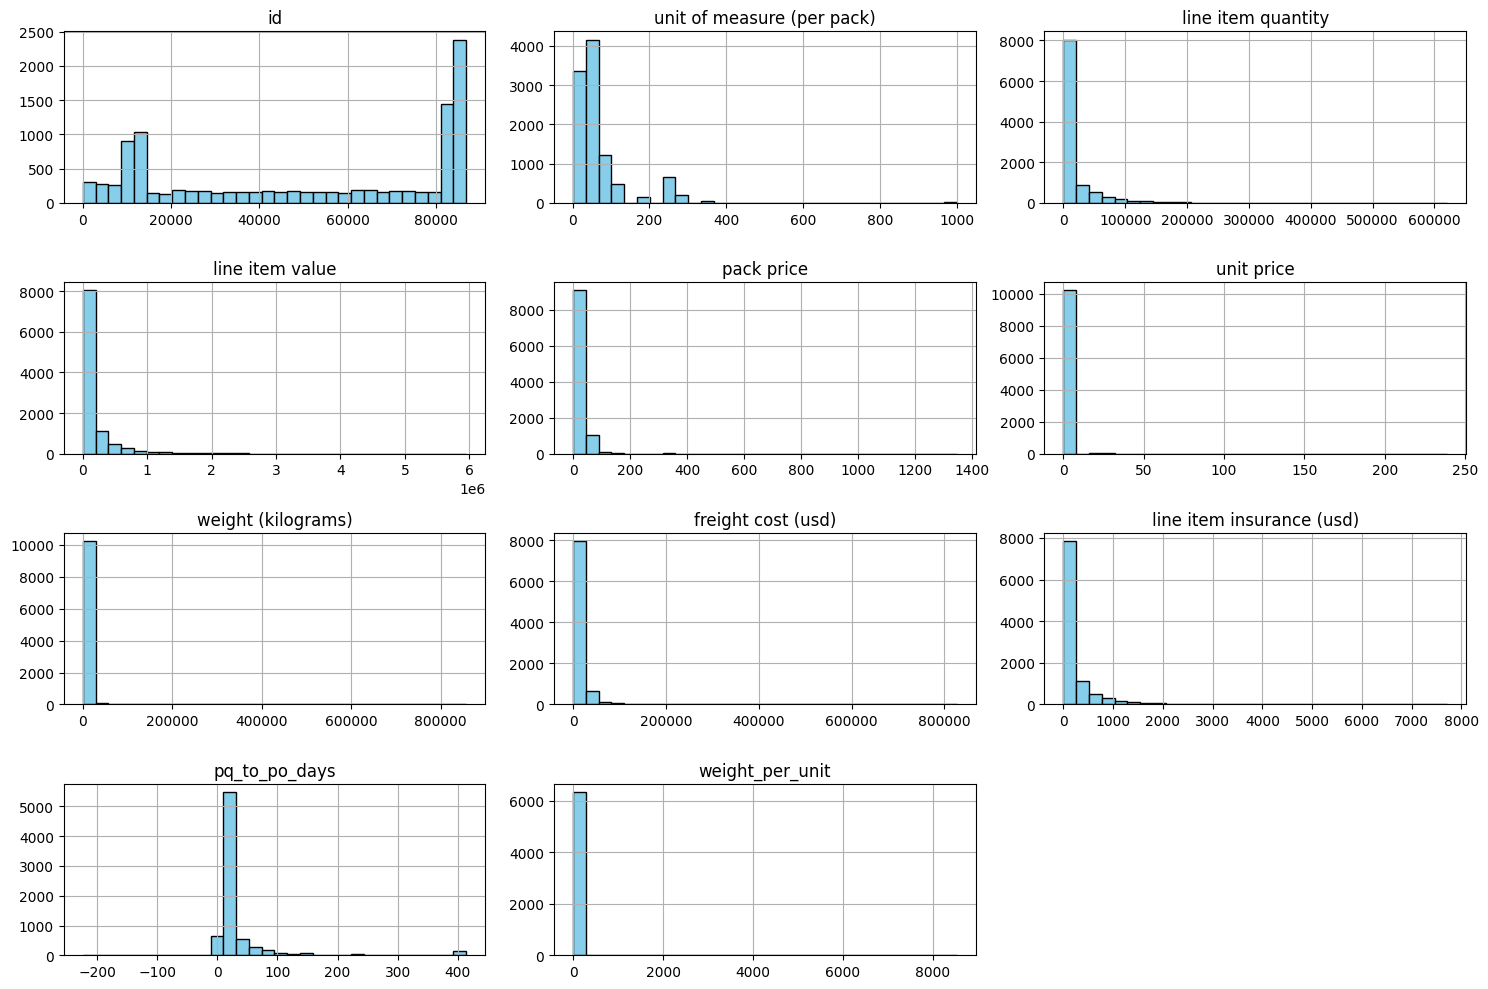

In [ ]:
# Plot histograms for all numerical columns to visualize distribution
df.hist(bins=30, figsize=(15,10), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

📊 Data Distribution Visualization
This histogram plot provides a visual overview of the distribution of all numerical features in the dataset.
The histograms reveal that most variables are highly skewed to the right (positively skewed), meaning a large concentration of lower values and a few extreme high outliers.
This insight suggests that further transformation or outlier treatment might be needed before proceeding to advanced analysis or modeling stages.

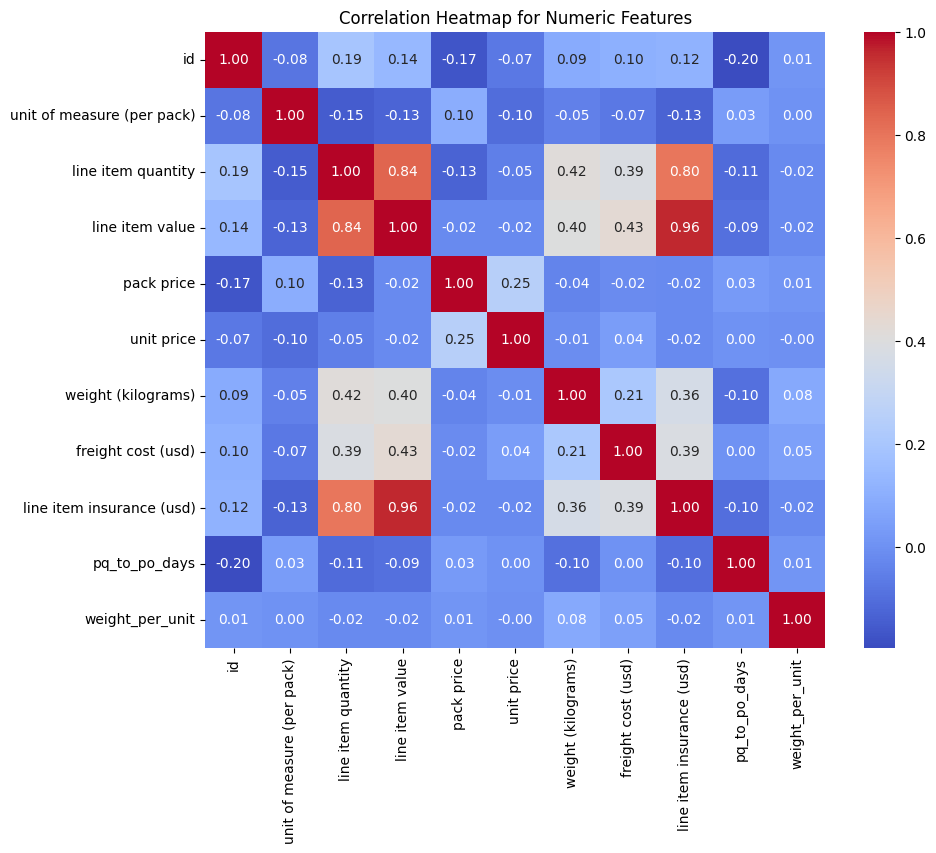

In [ ]:
# Select only numerical columns for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])

# Plot a correlation heatmap for numerical features
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Numeric Features')
plt.show()

🔥 Correlation Heatmap for Numeric Features
This heatmap visualizes the pairwise correlation coefficients between all numerical columns in the dataset.
The closer the value is to 1 or -1, the stronger the relationship:

Positive correlations (near 1) indicate a direct relationship.

Negative correlations (near -1) indicate an inverse relationship.

Values near 0 imply little or no correlation.

💡 Observation:

The heatmap shows a generally weak correlation among most features.

Some notable relationships appear between:

line item quantity & line item value (0.82) — as expected, larger quantities often increase the total value.

pack price & unit price (0.49) — moderate relationship due to unit scaling.

This step helps in identifying variables that might cause multicollinearity or could be useful in feature selection.



In [ ]:
# Convert date columns to datetime format
date_cols = [
    'pq first sent to client date', 'po sent to vendor date',
    'scheduled delivery date', 'delivered to client date',
    'delivery recorded date'
]

for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Verify the successful conversion of date columns
df[date_cols].dtypes


,0
pq first sent to client date,datetime64[ns]
po sent to vendor date,datetime64[ns]
scheduled delivery date,datetime64[ns]
delivered to client date,datetime64[ns]
delivery recorded date,datetime64[ns]


📅 Date Columns Conversion
In this step, all relevant date columns were converted to datetime format using pd.to_datetime() with errors='coerce' — which safely handles invalid formats by replacing them with NaT (Not a Time).

✅ Converted Columns:

pq first sent to client date

po sent to vendor date

scheduled delivery date

delivered to client date

delivery recorded date

💡 Verification Result:
All specified columns are now successfully converted to datetime64[ns], ensuring that future time-based calculations (like differences, sorting, filtering) will work correctly.



In [ ]:
# Calculate the delivery time difference between scheduled and actual delivery dates
df['delivery_time'] = (df['delivered to client date'] - df['scheduled delivery date']).dt.days

# Generate descriptive statistics for the new delivery_time column
df['delivery_time'].describe()



,delivery_time
count,10324.000000
mean,-6.023537
std,27.233640
min,-372.000000
25%,-3.000000
50%,0.000000
75%,0.000000
max,192.000000


####**The 'delivery_time' column was created to measure the difference (in days) between the actual delivery date and the scheduled delivery date.**
This helps assess the efficiency of the delivery process — negative values indicate early deliveries, zero means on-time delivery, and positive values indicate delays.

####**The summary statistics show:**
- The **average delivery_time is -6.02 days**, meaning that deliveries are typically made about 6 days ahead of schedule.
- The **standard deviation is 27.23**, reflecting high variability in delivery performance.
- The **minimum value (-372)** suggests extremely early deliveries, possibly due to data entry errors or exceptional cases.
- The **maximum value (192)** highlights some significantly delayed deliveries.
- **50% of deliveries are on time or early** (median = 0).

This analysis provides insight into the reliability and punctuality of the supply chain.


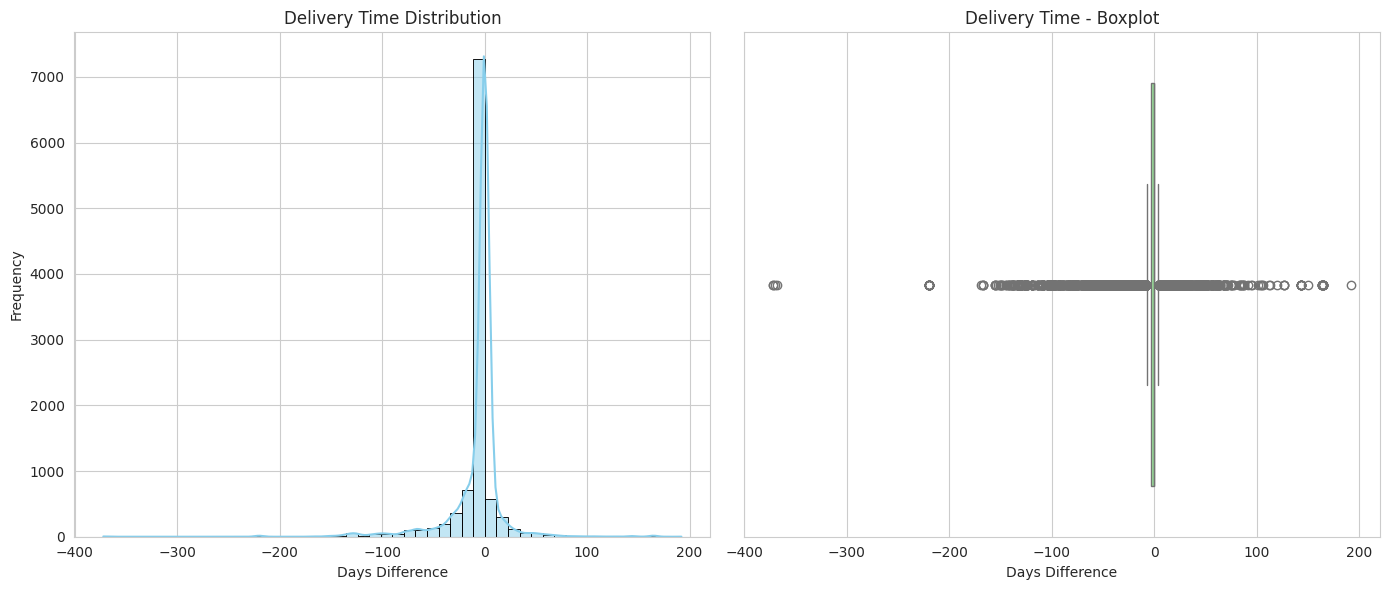

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style using Seaborn's style and apply it to Matplotlib
sns.set_style('whitegrid')  # Or try other Seaborn styles like 'darkgrid', 'white', 'dark', 'ticks'
# Create a figure with 2 subplots
plt.figure(figsize=(14,6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['delivery_time'], bins=50, kde=True, color='skyblue', edgecolor='black')
plt.title('Delivery Time Distribution')
plt.xlabel('Days Difference')
plt.ylabel('Frequency')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['delivery_time'], color='lightgreen')
plt.title('Delivery Time - Boxplot')
plt.xlabel('Days Difference')

plt.tight_layout()
plt.show()

📌 "Histogram shows the overall distribution of delivery times, while the Boxplot highlights potential outliers that could represent delivery anomalies."

In [ ]:
# Display the top 10 most frequent values for selected categorical columns
categorical_cols = ['country', 'managed by', 'shipment mode', 'vendor inco term',
                    'product group', 'sub classification', 'vendor', 'brand', 'dosage form']

for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts().head(10))



Column: country
country
South Africa     1406
Nigeria          1194
Côte d'Ivoire    1083
Uganda            779
Vietnam           688
Zambia            683
Haiti             655
Mozambique        631
Zimbabwe          538
Tanzania          519
Name: count, dtype: int64

Column: managed by
managed by
PMO - US                     10265
South Africa Field Office       57
Haiti Field Office               1
Ethiopia Field Office            1
Name: count, dtype: int64

Column: shipment mode
shipment mode
Air            6473
Truck          2830
Air Charter     650
Ocean           371
Name: count, dtype: int64

Column: vendor inco term
vendor inco term
N/A - FROM RDC    5404
EXW               2778
DDP               1443
FCA                397
CIP                275
DDU                 15
DAP                  9
CIF                  3
Name: count, dtype: int64

Column: product group
product group
ARV     8550
HRDT    1728
ANTM      22
ACT       16
MRDT       8
Name: count, dtype: int64

Column:

###**This code explores the most common categories in key categorical columns.**
For each selected column, the top 10 most frequent values are displayed along with their occurrence counts.

###**Purpose:**
- To identify dominant patterns or categories within the data.
- To detect potential class imbalance or over-representation of specific values.
- To get familiar with the distribution of categorical data before moving into deeper analysis or visualization.

This step is essential in supply chain datasets to understand product variety, shipping methods, vendor behavior, and geographic coverage.


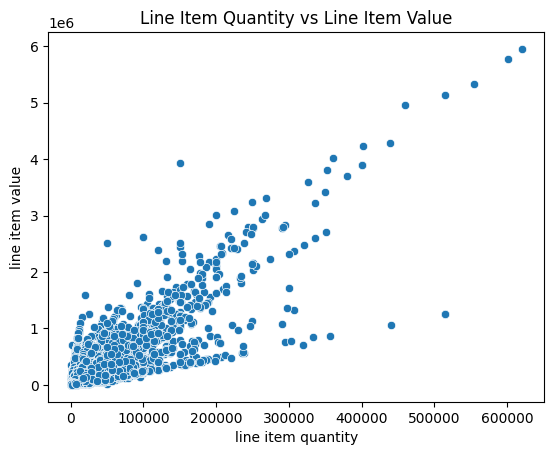

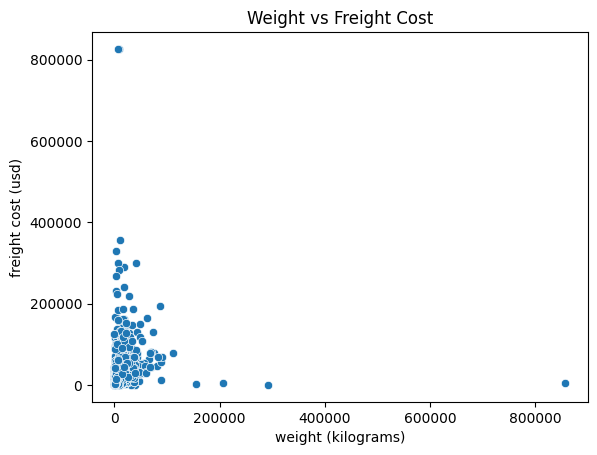

In [ ]:
# Plot scatter plots to visualize relationships between selected numerical columns
sns.scatterplot(x='line item quantity', y='line item value', data=df)
plt.title('Line Item Quantity vs Line Item Value')
plt.show()

sns.scatterplot(x='weight (kilograms)', y='freight cost (usd)', data=df)
plt.title('Weight vs Freight Cost')
plt.show()

##**Scatter Plot Analysis for Numerical Relationships**

The code generates scatter plots to visually explore the relationships between key numerical variables:

1. **Line Item Quantity vs Line Item Value**  
   This plot helps assess whether there is a linear or non-linear correlation between the quantity of items ordered and their total value. The observed upward trend suggests a strong positive relationship, meaning that larger orders tend to have higher total values.

2. **Weight (Kilograms) vs Freight Cost (USD)**  
   This plot examines the relationship between the shipment's weight and its associated freight cost. While a general positive relationship is expected, the plot reveals the presence of outliers and clusters, which might suggest special shipping agreements or rate inconsistencies.

These visual inspections are crucial for understanding potential dependencies, detecting outliers, and guiding further statistical analysis.
